<a href="https://colab.research.google.com/github/SarmenSinanian/DS-Unit-2-Applied-Modeling/blob/master/Sarmen_Sinanian_assignment_applied_modeling_ProjectV1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Plot the distribution of your target. 
    - Regression problem: Is your target skewed? Then, log-transform it.
    - Classification: Are your classes imbalanced? Then, don't use just accuracy. And try `class_balance` parameter in scikit-learn.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline?
- [ ] Share at least 1 visualization on Slack.

You need to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

### Today
- [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
- [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/)
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)


### Yesterday
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)






In [0]:
# conda install -c conda-forge category_encoders
# conda update -n base -c defaults conda
# pip install --upgrade category_encoders

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# ASSIGNMENT 1 BELOW (ASSIGNMENT 2 FURTHER DOWN)

# BELOW DATASET FROM https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=728294400&period2=1566889200&interval=1d&events=history&crumb=ixT1ci5YI3E

In [0]:
# Setting specific columns to use (using unadjusted close and not
#  accounting for the splits and dividends)
columns = ['Date','Close','Volume']

# Calling data set
spy = pd.read_csv(r'E:\Desktop\Lambda_School\Assignments\Unit 2 Sprint 7 PROJECT\SPY.csv',
                  usecols = columns)

In [0]:
# Checking columns
spy.head()

,Date,Close,Volume
0,1993-01-29,43.93750,1003200
1,1993-02-01,44.25000,480500
2,1993-02-02,44.34375,201300
3,1993-02-03,44.81250,529400
4,1993-02-04,45.00000,531500


In [0]:
spy.describe()

,Close,Volume
count,6692.000000,6.692000e+03
mean,134.816022,8.431367e+07
std,60.702370,9.810203e+07
min,43.406250,5.200000e+03
25%,97.203125,7.017450e+06
50%,124.729999,5.707685e+07
75%,152.867501,1.226404e+08
max,302.010010,8.710263e+08


In [0]:
spy.shape

(6692, 3)

In [0]:
spy.isna().sum()

Date      0
Close     0
Volume    0
dtype: int64

In [0]:
# Changing Dat to datetime format
spy['Date'] = pd.to_datetime(spy['Date'])

C:\Users\Sarmen\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


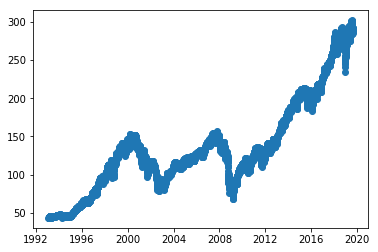

In [0]:
# Visualizing total dataset without volumne

plt.plot_date(spy['Date'], spy['Close'])

# Choose your target. Which column in your tabular dataset will you predict?


In [0]:
#  PRICE(CLOSE) NEXT DAY ABOVE/BELOW PREVIOUS DAY BASED ON ROLLING MEAN(SMA) OR RELATIVE STRENGTH (RSI)***

# Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.


### *WILL USE ALL SPY (S&P 500 ETF) DATA*

# Determine whether your problem is regression or classification.


### *CLASSIFICATION (IS THIS TICKER OVER/UNDER THE X_DAY ROLLING MEAN ***AND*** ALSO OVER/UNDER BOUGHT ON THE RSI?)*
### *AKA 3 WAY CONFUSION MATRIX WITH UNDER TO BOTH AS THE HIGHEST LIKELIHOOD PREDICTOR OF NEXT DAY/WEEKS/MONTHS POSITIVE RETURNS*

# Choose your evaluation metric.

### WILL USE ACCURACY SCORE

# Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.


In [0]:
spy.head()

,Date,Close,Volume
0,1993-01-29,43.93750,1003200
1,1993-02-01,44.25000,480500
2,1993-02-02,44.34375,201300
3,1993-02-03,44.81250,529400
4,1993-02-04,45.00000,531500


In [0]:
spy.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
dtype: object

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
spy['Date'] = pd.to_datetime(spy['Date'])
spy['Year'] = spy['Date'].dt.year

In [0]:
spy.head()

,Date,Close,Volume,Year
0,1993-01-29,43.93750,1003200,1993
1,1993-02-01,44.25000,480500,1993
2,1993-02-02,44.34375,201300,1993
3,1993-02-03,44.81250,529400,1993
4,1993-02-04,45.00000,531500,1993


In [0]:
spy.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
Year               int64
dtype: object

### *NEITHER .ROLLING_MEAN NOR .ROLLING WORK*

In [0]:
# spy['SMA'] = spy['Close'].rolling(window = 14, min_periods = 14, axis = 0)

In [0]:
# spy['SMA'] = pd.rolling_mean(spy['Close'], min_periods = 14, window = 14)

In [0]:
spy.isnull().sum()

Date      0
Close     0
Volume    0
Year      0
dtype: int64

In [0]:
spy.head()

,Date,Close,Volume,Year
0,1993-01-29,43.93750,1003200,1993
1,1993-02-01,44.25000,480500,1993
2,1993-02-02,44.34375,201300,1993
3,1993-02-03,44.81250,529400,1993
4,1993-02-04,45.00000,531500,1993


In [0]:
spy.head()

,Date,Close,Volume,Year
0,1993-01-29,43.93750,1003200,1993
1,1993-02-01,44.25000,480500,1993
2,1993-02-02,44.34375,201300,1993
3,1993-02-03,44.81250,529400,1993
4,1993-02-04,45.00000,531500,1993


# Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.


In [0]:
spy['SMA'] = spy.Close.rolling(window=14).mean()
spy['SMA_Yesterday'] = spy['SMA'].shift(1)

In [0]:
spy.head(15)

,Date,Close,Volume,Year,SMA,SMA_Yesterday
0,1993-01-29,43.93750,1003200,1993,NaN,NaN
1,1993-02-01,44.25000,480500,1993,NaN,NaN
2,1993-02-02,44.34375,201300,1993,NaN,NaN
3,1993-02-03,44.81250,529400,1993,NaN,NaN
4,1993-02-04,45.00000,531500,1993,NaN,NaN
5,1993-02-05,44.96875,492100,1993,NaN,NaN
6,1993-02-08,44.96875,596100,1993,NaN,NaN
7,1993-02-09,44.65625,122100,1993,NaN,NaN
8,1993-02-10,44.71875,379600,1993,NaN,NaN
9,1993-02-11,44.93750,19500,1993,NaN,NaN


In [0]:
spy.tail()

,Date,Close,Volume,Year,SMA,SMA_Yesterday
6687,2019-08-20,290.089996,51596400,2019,289.480711,290.004996
6688,2019-08-21,292.450012,49524700,2019,289.309997,289.480711
6689,2019-08-22,292.359985,51666400,2019,289.291425,289.309997
6690,2019-08-23,284.850006,149161500,2019,289.364997,289.291425
6691,2019-08-26,288.000000,72423800,2019,289.379283,289.364997


In [0]:
spy.isna().sum()

Date              0
Close             0
Volume            0
Year              0
SMA              13
SMA_Yesterday    14
dtype: int64

In [0]:
spy.dtypes

Date             datetime64[ns]
Close                   float64
Volume                    int64
Year                      int64
SMA                     float64
SMA_Yesterday           float64
dtype: object

In [0]:
# spy['Close_Higher'] = np.where(spy['Close'] > spy['Close'].shift(-1), 'True','False')

In [0]:
# spy_numeric = ['Close']

In [0]:
spy['Above_14D_SMA_Yesterday'] = np.where(spy['SMA'].shift(1)<spy['Close'].shift(1), 0,1)

In [0]:
spy['Below_14D_SMA_Yesterday'] = np.where(spy['SMA'].shift(1)>spy['Close'].shift(1), 0,1)

In [0]:
# spy['Above_14D_SMA_Yesterday'] = np.where(spy['SMA']>spy['Close'], 'True','False')

In [0]:
spy.Above_14D_SMA_Yesterday.value_counts(normalize=True)

0    0.605649
1    0.394351
Name: Above_14D_SMA_Yesterday, dtype: float64

In [0]:
spy_numeric_diff = spy[['Close']].diff()[1:]
# cond1 = spy_numeric_diff[['Close']] >=0
spy['Close_Higher_Than_Yesterday'] = np.insert(np.where(spy_numeric_diff[['Close']] >=0, '1','0'), 0, np.nan)

In [0]:
spy.Close_Higher_Than_Yesterday.value_counts(normalize=True)

1    0.541393
0    0.458458
n    0.000149
Name: Close_Higher_Than_Yesterday, dtype: float64

In [0]:
y_train = spy['Close_Higher_Than_Yesterday']

In [0]:
majority_class = y_train.mode()[0]

In [0]:
y_pred = [majority_class]*len(y_train)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.5413927077106994

# Begin to clean and explore your data.

### *I BELIEVE THIS IS ALREADY DONE*

In [0]:
spy_2019 = spy[spy['Year'] == 2019]
spy_2018 = spy[spy['Year'] == 2018]
spy_2017 = spy[spy['Year'] == 2017]
spy_2016 = spy[spy['Year'] == 2016]
spy_2015 = spy[spy['Year'] == 2015]
spy_2014 = spy[spy['Year'] == 2014]
spy_2013 = spy[spy['Year'] == 2013]
spy_2012 = spy[spy['Year'] == 2012]
spy_2011 = spy[spy['Year'] == 2011]
spy_2010 = spy[spy['Year'] == 2010]
spy_2009 = spy[spy['Year'] == 2009]
spy_2008 = spy[spy['Year'] == 2008]
spy_2007 = spy[spy['Year'] == 2007]
spy_2006 = spy[spy['Year'] == 2006]
spy_2005 = spy[spy['Year'] == 2005]
spy_2004 = spy[spy['Year'] == 2004]
spy_2003 = spy[spy['Year'] == 2003]
spy_2002 = spy[spy['Year'] == 2002]
spy_2001 = spy[spy['Year'] == 2001]
spy_2000 = spy[spy['Year'] == 2000]
spy_1999 = spy[spy['Year'] == 1999]
spy_1998 = spy[spy['Year'] == 1998]
spy_1997 = spy[spy['Year'] == 1997]
spy_1996 = spy[spy['Year'] == 1996]
spy_1995 = spy[spy['Year'] == 1995]
spy_1994 = spy[spy['Year'] == 1994]
spy_1993 = spy[spy['Year'] == 1993]

# END ASSIGNMENT 1

# ASSIGNMENT 2 BELOW

# You need to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

# Plot the distribution of your target.
### Regression problem: Is your target skewed? Then, log-transform it.
### Classification: Are your classes imbalanced? Then, don't use just accuracy. And try class_balance parameter in scikit-learn.


 

In [0]:
spy.tail(25)

,Date,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday
6667,2019-07-23,300.029999,44564500,2019,298.717139,298.459996,1,0,1
6668,2019-07-24,301.440002,47213200,2019,298.905712,298.717139,0,1,1
6669,2019-07-25,300.000000,55394100,2019,299.015712,298.905712,0,1,0
6670,2019-07-26,302.010010,45084100,2019,299.386427,299.015712,0,1,1
6671,2019-07-29,301.459991,38126500,2019,299.691426,299.386427,0,1,0
6672,2019-07-30,300.720001,45849000,2019,299.842141,299.691426,0,1,0
6673,2019-07-31,297.429993,104245200,2019,299.707855,299.842141,0,1,0
6674,2019-08-01,294.839996,142646600,2019,299.292855,299.707855,1,0,0
6675,2019-08-02,292.619995,116749700,2019,298.712141,299.292855,1,0,0
6676,2019-08-05,283.820007,178745400,2019,297.572141,298.712141,1,0,0


In [0]:
spy_1994_2013 = pd.concat([spy_1994,spy_1995,spy_1996,spy_1997,spy_1998,
                           spy_1999,spy_2000,spy_2001,spy_2002,spy_2003,
                           spy_2004,spy_2005,spy_2006,spy_2007,spy_2008,
                           spy_2009,spy_2010,spy_2011,spy_2012,spy_2013])
spy_1994_2013.describe()

,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday
count,5036.000000,5.036000e+03,5036.000000,5036.000000,5036.000000,5036.000000,5036.000000
mean,111.468242,8.429327e+07,2003.494043,111.292774,111.266038,0.402701,0.597299
std,30.940716,1.084023e+08,5.768917,30.865436,30.863032,0.490490,0.490490
min,43.906250,5.200000e+03,1994.000000,44.590402,44.590402,0.000000,0.000000
25%,92.554688,5.681350e+06,1998.000000,92.436674,92.421875,0.000000,0.000000
50%,116.040001,4.162765e+07,2003.000000,115.814286,115.804286,0.000000,1.000000
75%,133.587502,1.331848e+08,2008.000000,133.438749,133.437768,1.000000,1.000000
max,184.690002,8.710263e+08,2013.000000,181.375715,181.094286,1.000000,1.000000


In [0]:
target = ['Close_Higher_Than_Yesterday']
drop = ['Date','Year']


train = spy_1994_2013.drop(columns=drop)
test = spy_2017.drop(columns=drop)
val = spy_2019.drop(columns=drop)

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

X_train = train.drop(columns=target)
y_train = train[target]

In [0]:
X_test.head()

,Close,Volume,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday
6026,225.240005,91366500,225.576429,225.648572,1,0
6027,226.580002,78744400,225.492144,225.576429,1,0
6028,226.399994,78379000,225.529286,225.492144,0,1
6029,227.210007,71559900,225.557858,225.529286,0,1
6030,226.460007,46939700,225.659288,225.557858,0,1


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [0]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('MAJORITY CLASS Validation Accuracy', pipeline.score(X_val, y_val))

C:\Users\Sarmen\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


MAJORITY CLASS Validation Accuracy 0.5548780487804879


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

y_pred = pipeline.predict(X_val)

confusion_matrix(y_val, y_pred)

array([[32, 36],
       [37, 59]], dtype=int64)

In [0]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    return columns, index

plot_confusion_matrix(y_val, y_pred)

(['Predicted 0', 'Predicted 1'], ['Actual 0', 'Actual 1'])

In [0]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return table

plot_confusion_matrix(y_val, y_pred)

,Predicted 0,Predicted 1
Actual 0,32,36
Actual 1,37,59


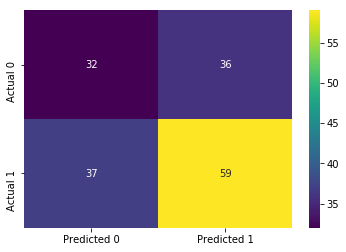

In [0]:
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.47      0.47        68
           1       0.62      0.61      0.62        96

   micro avg       0.55      0.55      0.55       164
   macro avg       0.54      0.54      0.54       164
weighted avg       0.56      0.55      0.56       164



# Continue to clean and explore your data. Make exploratory visualizations.

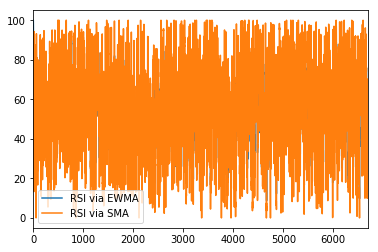

In [0]:
import pandas as pd

Close = spy['Close']

# Get the difference in price from previous step

delta = Close.diff()

# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# # Calculate the EWMA

spy['Roll_Up'] = up.shift(1)
spy['Roll_Down'] = down.abs().shift(1)

spy['Roll_Up1'] = spy['Roll_Up'].ewm(com=7).mean()
spy['Roll_Down1'] = spy['Roll_Down'].ewm(com=7).mean()

# # Calculate the RSI based on EWMA

RS1 = spy['Roll_Up1'] / spy['Roll_Down1']
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

spy['RSI_Yesterday_EXP'] = RSI1

# Calculate the SMA
spy['Roll_Up2'] = spy['Roll_Up'].rolling(window = 7).mean()
spy['Roll_Down2'] = spy['Roll_Down'].rolling(window = 7).mean()

# Calculate the RSI based on SMA
RS2 = spy['Roll_Up2'] / spy['Roll_Down2']
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

spy['RSI_Yesterday_SMA'] = RSI2

# Compare graphically
plt.figure()
RSI1.plot()
RSI2.plot()
plt.legend(['RSI via EWMA', 'RSI via SMA'])
plt.show()

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
spy.head(20)

,Date,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA
0,1993-01-29,43.93750,1003200,1993,NaN,NaN,1,1,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-02-01,44.25000,480500,1993,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-02-02,44.34375,201300,1993,NaN,NaN,1,1,1,0.31250,0.00000,0.312500,0.000000,100.000000,NaN,NaN,NaN
3,1993-02-03,44.81250,529400,1993,NaN,NaN,1,1,1,0.09375,0.00000,0.199353,0.000000,100.000000,NaN,NaN,NaN
4,1993-02-04,45.00000,531500,1993,NaN,NaN,1,1,1,0.46875,0.00000,0.295414,0.000000,100.000000,NaN,NaN,NaN
5,1993-02-05,44.96875,492100,1993,NaN,NaN,1,1,0,0.18750,0.00000,0.265583,0.000000,100.000000,NaN,NaN,NaN
6,1993-02-08,44.96875,596100,1993,NaN,NaN,1,1,1,0.00000,0.03125,0.204896,0.007141,96.632330,NaN,NaN,NaN
7,1993-02-09,44.65625,122100,1993,NaN,NaN,1,1,0,0.00000,0.00000,0.164599,0.005736,96.632330,NaN,NaN,NaN
8,1993-02-10,44.71875,379600,1993,NaN,NaN,1,1,1,0.00000,0.31250,0.135951,0.059127,69.690392,NaN,NaN,NaN
9,1993-02-11,44.93750,19500,1993,NaN,NaN,1,1,1,0.06250,0.00000,0.124407,0.049834,71.399142,NaN,NaN,NaN


In [0]:
spy.tail()

,Date,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA
6687,2019-08-20,290.089996,51596400,2019,289.480711,290.004996,0,1,0,3.479981,0.000000,1.447046,1.454933,49.864107,1.622140,2.221427,42.204029
6688,2019-08-21,292.450012,49524700,2019,289.309997,289.480711,0,1,1,0.000000,2.239991,1.350576,1.507270,47.258529,1.622140,2.146426,43.043965
6689,2019-08-22,292.359985,51666400,2019,289.291425,289.309997,0,1,0,2.360016,0.000000,1.417872,1.406786,50.196246,1.790713,1.961426,47.725122
6690,2019-08-23,284.850006,149161500,2019,289.364997,289.291425,0,1,0,0.000000,0.090027,1.323348,1.319002,50.082231,1.790713,1.809285,49.742053
6691,2019-08-26,288.000000,72423800,2019,289.379283,289.364997,1,0,1,0.000000,7.509979,1.235124,1.731734,41.630720,1.790713,1.717141,51.048666


In [0]:
spy['Overbought_Yesterday_EXP'] = spy['RSI_Yesterday_EXP'].shift(1) > 70.0
spy['Oversold_Yesterday_EXP'] = spy['RSI_Yesterday_EXP'].shift(1) < 30.0

spy['Overbought_Yesterday_SMA'] = spy['RSI_Yesterday_SMA'].shift(1) > 70.0
spy['Oversold_Yesterday_SMA'] = spy['RSI_Yesterday_SMA'].shift(1) < 30.0

In [0]:
spy['Overbought_Yesterday_EXP'].replace(to_replace=False,value=0, inplace=True)
spy['Oversold_Yesterday_EXP'].replace(to_replace=False,value=0, inplace=True)

spy['Overbought_Yesterday_SMA'].replace(to_replace=False,value=0, inplace=True)
spy['Oversold_Yesterday_SMA'].replace(to_replace=False,value=0, inplace=True)

In [0]:
spy.head()

,Date,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday,Volume_Yesterday
0,1993-01-29,43.93750,1003200,1993,NaN,NaN,1,1,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1993-02-01,44.25000,480500,1993,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1003200.0
2,1993-02-02,44.34375,201300,1993,NaN,NaN,1,1,1,0.31250,0.0,0.312500,0.0,100.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,480500.0
3,1993-02-03,44.81250,529400,1993,NaN,NaN,1,1,1,0.09375,0.0,0.195833,0.0,100.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,201300.0
4,1993-02-04,45.00000,531500,1993,NaN,NaN,1,1,1,0.46875,0.0,0.299186,0.0,100.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,529400.0


In [0]:
spy['Oversold_EXP_And_Under_14D_SMA_Yesterday'] = ((spy['Oversold_Yesterday_EXP'] ==1) & (spy['Below_14D_SMA_Yesterday'] == 0))
spy['Oversold_SMA_And_Under_14D_SMA_Yesterday'] = ((spy['Oversold_Yesterday_SMA'] ==1) & (spy['Below_14D_SMA_Yesterday'] == 0))

In [0]:
spy['Oversold_EXP_And_Under_14D_SMA_Yesterday'].replace(to_replace=False,value=0, inplace=True)
spy['Oversold_SMA_And_Under_14D_SMA_Yesterday'].replace(to_replace=False,value=0, inplace=True)

In [0]:
spy.head()

,Date,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday
0,1993-01-29,43.93750,1003200,1993,NaN,NaN,1,1,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,1993-02-01,44.25000,480500,1993,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,1993-02-02,44.34375,201300,1993,NaN,NaN,1,1,1,0.31250,0.0,0.312500,0.0,100.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,1993-02-03,44.81250,529400,1993,NaN,NaN,1,1,1,0.09375,0.0,0.199353,0.0,100.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
4,1993-02-04,45.00000,531500,1993,NaN,NaN,1,1,1,0.46875,0.0,0.295414,0.0,100.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0


In [0]:
spy.Oversold_EXP_And_Under_14D_SMA_Yesterday.value_counts()

0.0    6613
1.0      79
Name: Oversold_EXP_And_Under_14D_SMA_Yesterday, dtype: int64

In [0]:
spy.Oversold_SMA_And_Under_14D_SMA_Yesterday.value_counts()

0.0    6366
1.0     326
Name: Oversold_SMA_And_Under_14D_SMA_Yesterday, dtype: int64

In [0]:
spy['Volume_Yesterday'] = spy['Volume'].shift(1)

In [0]:
spy_2019 = spy[spy['Year'] == 2019]
spy_2018 = spy[spy['Year'] == 2018]
spy_2017 = spy[spy['Year'] == 2017]
spy_2016 = spy[spy['Year'] == 2016]
spy_2015 = spy[spy['Year'] == 2015]
spy_2014 = spy[spy['Year'] == 2014]
spy_2013 = spy[spy['Year'] == 2013]
spy_2012 = spy[spy['Year'] == 2012]
spy_2011 = spy[spy['Year'] == 2011]
spy_2010 = spy[spy['Year'] == 2010]
spy_2009 = spy[spy['Year'] == 2009]
spy_2008 = spy[spy['Year'] == 2008]
spy_2007 = spy[spy['Year'] == 2007]
spy_2006 = spy[spy['Year'] == 2006]
spy_2005 = spy[spy['Year'] == 2005]
spy_2004 = spy[spy['Year'] == 2004]
spy_2003 = spy[spy['Year'] == 2003]
spy_2002 = spy[spy['Year'] == 2002]
spy_2001 = spy[spy['Year'] == 2001]
spy_2000 = spy[spy['Year'] == 2000]
spy_1999 = spy[spy['Year'] == 1999]
spy_1998 = spy[spy['Year'] == 1998]
spy_1997 = spy[spy['Year'] == 1997]
spy_1996 = spy[spy['Year'] == 1996]
spy_1995 = spy[spy['Year'] == 1995]
spy_1994 = spy[spy['Year'] == 1994]
spy_1993 = spy[spy['Year'] == 1993]

In [0]:
spy_1994_2013 = spy[(spy['Year'] >= 1994) & (spy['Year'] <=2013)]
spy_1994_2017 = spy[(spy['Year'] >= 1994) & (spy['Year'] <=2017)]
spy_2014_2019 = spy[(spy['Year'] >=2014) & (spy['Year'] <=2019)]

In [0]:
spy_2010_2013 = pd.concat([spy_2010,spy_2011,spy_2012,spy_2013])
spy_2010_2013.head()

,Date,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday,Volume_Yesterday
4264,2010-01-04,113.330002,118944600,2010,111.799286,111.640714,1,0,1,0.000000,1.079995,0.245757,0.270829,47.573280,0.198571,0.182857,52.059927,0.0,0.0,1.0,0.0,0.0,0.0,90637900.0
4265,2010-01-05,113.629997,111579900,2010,111.925000,111.799286,0,1,1,1.890000,0.000000,0.451287,0.236975,65.569046,0.411428,0.182857,69.230771,0.0,0.0,0.0,0.0,0.0,0.0,118944600.0
4266,2010-01-06,113.709999,116074400,2010,112.093571,111.925000,0,1,1,0.299995,0.000000,0.432376,0.207353,67.587305,0.422857,0.182857,69.811330,0.0,0.0,0.0,0.0,0.0,0.0,111579900.0
4267,2010-01-07,114.190002,131091100,2010,112.284286,112.093571,0,1,1,0.080002,0.000000,0.388329,0.181434,68.156200,0.358571,0.182857,66.226886,0.0,0.0,0.0,0.0,0.0,0.0,116074400.0
4268,2010-01-08,114.570000,126402800,2010,112.597857,112.284286,0,1,1,0.480003,0.000000,0.399788,0.158755,71.576956,0.392857,0.182857,68.238230,0.0,0.0,0.0,0.0,0.0,0.0,131091100.0


In [0]:
spy_2010_2013.columns

Index(['Date', 'Close', 'Volume', 'Year', 'SMA', 'SMA_Yesterday', 'Above_14D_SMA_Yesterday', 'Below_14D_SMA_Yesterday', 'Close_Higher_Than_Yesterday', 'Roll_Up', 'Roll_Down', 'Roll_Up1', 'Roll_Down1', 'RSI_Yesterday_EXP', 'Roll_Up2', 'Roll_Down2', 'RSI_Yesterday_SMA', 'Overbought_Yesterday_EXP', 'Oversold_Yesterday_EXP', 'Overbought_Yesterday_SMA', 'Oversold_Yesterday_SMA', 'Oversold_EXP_And_Under_14D_SMA_Yesterday', 'Oversold_SMA_And_Under_14D_SMA_Yesterday', 'Volume_Yesterday'], dtype='object')

In [0]:
# 2018 training data

# 0.0091 ± 0.0183	SMA_Yesterday
# 0.0061 ± 0.0000	Oversold_SMA_And_Under_14D_SMA_Yesterday
# 0.0061 ± 0.0000	Oversold_Yesterday_SMA
# 0 ± 0.0000	Oversold_EXP_And_Under_14D_SMA_Yesterday
# 0 ± 0.0000	Oversold_Yesterday_EXP
# -0.0030 ± 0.0183	Overbought_Yesterday_SMA
# -0.0061 ± 0.0000	Above_14D_SMA_Yesterday
# -0.0091 ± 0.0183	Overbought_Yesterday_EXP
# -0.0091 ± 0.0427	RSI_Yesterday_SMA
# -0.0091 ± 0.0305	Below_14D_SMA_Yesterday
# -0.0122 ± 0.0488	Volume_Yesterday
# -0.0213 ± 0.0427	RSI_Yesterday_EXP

In [0]:
# 1994-2013 training data

# 0 ± 0.0000	Oversold_Yesterday_EXP
# 0 ± 0.0000	SMA_Yesterday
# 0 ± 0.0000	Year
# -0.0040 ± 0.0000	Oversold_EXP_And_Under_14D_SMA_Yesterday
# -0.0040 ± 0.0000	Overbought_Yesterday_EXP
# -0.0060 ± 0.0120	Oversold_SMA_And_Under_14D_SMA_Yesterday
# -0.0159 ± 0.0159	Overbought_Yesterday_SMA
# -0.0199 ± 0.0000	RSI_Yesterday_EXP
# -0.0219 ± 0.0120	Volume_Yesterday

In [0]:
# BELOW IS THE DROP FOR TRAIN 1994-2013 AND VAL 2019

# 0.0823 ± 0.0427	Overbought_Yesterday_SMA
# 0.0671 ± 0.0366	RSI_Yesterday_EXP
# 0.0549 ± 0.0122	RSI_Yesterday_SMA
# 0.0335 ± 0.0061	Above_14D_SMA_Yesterday
# 0.0305 ± 0.0000	Below_14D_SMA_Yesterday
# 0.0061 ± 0.0122	Overbought_Yesterday_EXP
# 0 ± 0.0000	Volume_Yesterday
# 0 ± 0.0000	Oversold_SMA_And_Under_14D_SMA_Yesterday
# 0 ± 0.0000	Oversold_EXP_And_Under_14D_SMA_Yesterday
# 0 ± 0.0000	Oversold_Yesterday_EXP
# 0 ± 0.0000	SMA_Yesterday
# -0.0030 ± 0.0061	Oversold_Yesterday_SMA

# DROP BELOW AFTER TRAINING/VAL PERMUTATION IMPORTANCE

# 0.0030 ± 0.0305	Overbought_Yesterday_SMA
# 0.0030 ± 0.0061	Overbought_Yesterday_EXP
# -0.0030 ± 0.0061	Below_14D_SMA_Yesterday
# -0.0457 ± 0.0793	RSI_Yesterday_SMA

In [0]:
# 0.0183 ± 0.0122	Overbought_Yesterday_SMAx
# 0.0091 ± 0.0061	Below_14D_SMA_Yesterday
# 0.0061 ± 0.0000	Oversold_SMA_And_Under_14D_SMA_Yesterday
# 0.0061 ± 0.0122	Overbought_Yesterday_EXP
# 0 ± 0.0000	Oversold_EXP_And_Under_14D_SMA_Yesterday
# 0 ± 0.0000	SMA_Yesterday
# 0 ± 0.0000	Year
# -0.0061 ± 0.0000	Oversold_Yesterday_SMA
# -0.0061 ± 0.0122	Above_14D_SMA_Yesterday
# -0.0091 ± 0.0061	Oversold_Yesterday_EXP
# -0.0091 ± 0.0427	RSI_Yesterday_EXP
# -0.0122 ± 0.0000	Volume_Yesterday
# -0.0274 ± 0.0305	RSI_Yesterday_SMAx

In [0]:
target = 'Close_Higher_Than_Yesterday'
# drop = ['Date','Year','SMA','Volume','Adj_Close','Roll_Up','Roll_Down','Oversold_And_Under_14D_SMA_Yesterday']
# drop = ['Date','Year','SMA','Volume','Adj_Close','Roll_Up','Roll_Down', 'Above_14D_SMA_Yesterday',
#         'Overbought_Yesterday','RSI']

# drop = ['Date','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2','RSI_Yesterday_SMA','Oversold_Yesterday_EXP','SMA_Yesterday',
#         'Year','Oversold_EXP_And_Under_14D_SMA_Yesterday','Overbought_Yesterday_EXP',
#         'Oversold_SMA_And_Under_14D_SMA_Yesterday','Overbought_Yesterday_SMA','RSI_Yesterday_EXP',
#         'Volume_Yesterday']


# drop = ['Date','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2','RSI_Yesterday_EXP','Volume_Yesterday','Below_14D_SMA_Yesterday',
#         'Year','RSI_Yesterday_SMA','Overbought_Yesterday_EXP','Above_14D_SMA_Yesterday',
#         'Overbought_Yesterday_SMA'
#         ]

# BELOW ARE STANDARD DROPS (SOME CONTAIN FUTURE LEAKAGE)

# drop = ['Date','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2']

# BELOW IS THE DROP FOR TRAIN 1994-2013 AND VAL 2019

#1
# drop = ['Date','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2','Year','Volume_Yesterday','Oversold_SMA_And_Under_14D_SMA_Yesterday',
#         'Oversold_EXP_And_Under_14D_SMA_Yesterday','Oversold_Yesterday_EXP','SMA_Yesterday',
#         'Oversold_Yesterday_SMA','Overbought_Yesterday_SMA','Overbought_Yesterday_EXP',
#         'Below_14D_SMA_Yesterday','RSI_Yesterday_SMA']

#2
# drop = ['Date','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2','Overbought_Yesterday_EXP','Oversold_Yesterday_SMA',
#         'Year','SMA_Yesterday','RSI_Yesterday_SMA','Oversold_EXP_And_Under_14D_SMA_Yesterday',
#         'Oversold_SMA_And_Under_14D_SMA_Yesterday','Oversold_Yesterday_EXP','RSI_Yesterday_EXP',
#         'Above_14D_SMA_Yesterday']

#3
drop = ['Date','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
        'Close','Roll_Down2','RSI_Yesterday_SMA','Overbought_Yesterday_SMA','Volume_Yesterday',
        'Oversold_EXP_And_Under_14D_SMA_Yesterday','Year','SMA_Yesterday','Below_14D_SMA_Yesterday',
        'Oversold_SMA_And_Under_14D_SMA_Yesterday','Overbought_Yesterday_EXP','Oversold_Yesterday_EXP',
        'Oversold_Yesterday_SMA','Above_14D_SMA_Yesterday']

train = spy_1994_2013.drop(columns=drop)
test = spy_2015.drop(columns=drop)
val = spy_2019.drop(columns=drop)

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

X_train = train.drop(columns=target)
y_train = train[target]

In [0]:
y_val.value_counts()

1    96
0    68
Name: Close_Higher_Than_Yesterday, dtype: int64

In [0]:
y_train.value_counts()

1    2723
0    2313
Name: Close_Higher_Than_Yesterday, dtype: int64

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [0]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.6219512195121951


In [0]:
y_val.describe()

count     164
unique      2
top         1
freq       96
Name: Close_Higher_Than_Yesterday, dtype: object

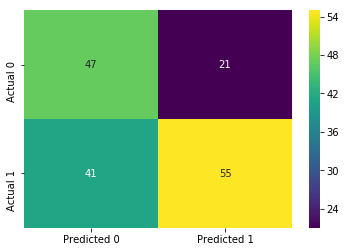

In [0]:
y_pred=pipeline.predict(X_val)

plot_confusion_matrix(y_val,y_pred)

In [0]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.69      0.60        68
           1       0.72      0.57      0.64        96

   micro avg       0.62      0.62      0.62       164
   macro avg       0.63      0.63      0.62       164
weighted avg       0.65      0.62      0.62       164



# Fit a model. Does it beat your baseline?

### ROC AUC (GIVING GENERIC VALUES OF .5 ...)

In [0]:
# from sklearn.metrics import roc_auc_score

# y_pred_proba = np.full_like(y_val, fill_value=1.00)
# roc_auc_score(y_val, y_pred_proba)

# y_pred_proba = np.full_like(y_val, fill_value=0)
# roc_auc_score(y_val, y_pred_proba)

# y_pred_proba = np.full_like(y_val, fill_value=0.50)
# roc_auc_score(y_val, y_pred_proba)

# BELOW THROWS ERROR:
# UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless

In [0]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(y_val=='Charged Off', y_pred_proba)
# plt.plot(fpr, tpr)
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate');

In [0]:
y_val.value_counts()

1    96
0    68
Name: Close_Higher_Than_Yesterday, dtype: int64

In [0]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.OrdinalEncoder(), # Not ideal for Linear Regression 
    StandardScaler(), 
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 -0.008820121704945949


In [0]:
X_val.columns

Index(['RSI_Yesterday_EXP'], dtype='object')

In [0]:
X_val.RSI_Yesterday_EXP.value_counts()

66.250941    1
64.995882    1
49.934516    1
66.413925    1
52.346811    1
33.027272    1
61.923501    1
72.069442    1
67.690145    1
63.118631    1
75.762480    1
62.559991    1
32.800641    1
41.876480    1
64.497058    1
53.929987    1
70.030815    1
72.786860    1
66.079734    1
46.205535    1
16.204142    1
62.650318    1
41.037607    1
78.526594    1
46.186289    1
47.399152    1
56.085905    1
39.233029    1
63.307480    1
62.332329    1
73.143364    1
52.997099    1
69.541180    1
61.689173    1
33.585081    1
31.863544    1
38.237449    1
79.751835    1
57.644014    1
61.196524    1
58.036994    1
57.445755    1
36.608374    1
63.341861    1
39.549322    1
72.110179    1
73.970539    1
61.813928    1
73.463224    1
52.974894    1
67.536891    1
77.363824    1
49.170897    1
77.955396    1
56.004027    1
57.713052    1
58.985043    1
23.557179    1
72.477280    1
66.429245    1
59.429897    1
75.639324    1
67.626082    1
68.188860    1
69.330708    1
34.795042    1
66.791348 

In [0]:
X_val_example = X_val[X_val['RSI_Yesterday_EXP'] <= 30]
X_val_example

,RSI_Yesterday_EXP
6619,23.557179
6630,29.247805
6632,25.547250
6633,24.399292
6676,28.129243
6677,16.204142


In [0]:
example = X_val_example.iloc[[0]]
example

,RSI_Yesterday_EXP
6619,23.557179


In [0]:
pred = lr.predict(example)[0]
print(f'Predicted Probability Close Higher Today: {pred:.2f}')

Predicted Probability Close Higher Today: 0.58


In [0]:
example2 = X_val_example.iloc[[1]]
pred2 = lr.predict(example2)[0]
print(f'Predicted Probability Close Higher Today: {pred2:.2f}')

Predicted Probability Close Higher Today: 0.57


In [0]:
example2

,RSI_Yesterday_EXP
6630,29.247805


In [0]:
example3 = X_val.iloc[[4]]
pred3 = lr.predict(example3)[0]
print(f'Predicted Probability Close Higher Today: {pred3:.2f}')

Predicted Probability Close Higher Today: 0.54


In [0]:
example3

,RSI_Yesterday_EXP
6532,54.99024


In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [0]:
# conda install -c conda-forge category_encoders
# pip install category_encoders
# pip install plotly==4.1.0
# conda install -c conda-forge eli5 

import eli5
from eli5.sklearn import PermutationImportance

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

permuter = PermutationImportance(
    model, scoring='accuracy', n_iter=2, random_state=42
)

permuter.fit(X_val, y_val)
feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter,
    top=None,
    feature_names = feature_names
)

Weight,Feature
0.1098 ± 0.0000,RSI_Yesterday_EXP


# DO XGBOOST IN COLAB

In [0]:
# !conda install -c mndrake xgboost

In [0]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train_log)
y_pred_log = gb.predict(X_val)
y_pred = np.expm1(y_pred_log)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

In [0]:
pip install pdpbox

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Close'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

# Share at least 1 visualization on Slack.

In [0]:
spy.iloc[[2]].to_string()

In [0]:
spy.iloc[[2]]